**Idea:** Check if class name frequency correlates well with class frequency (frequency of examples of this class)

In [4]:
import copy
import random
from pprint import pprint
from itertools import chain
from collections import Counter

import torch
import torch.nn as nn
import torch.nn.functional as F

import transformers
from transformers import AutoModel, AutoTokenizer
import datasets

import wandb
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import class_attention as cat

%load_ext autoreload
%autoreload 2


def detorch(x):
    return x.detach().cpu().numpy()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
news_dataset = datasets.load_dataset("Fraser/news-category-dataset")

Using custom data configuration default
Reusing dataset news_category (/home/vlialin/.cache/huggingface/datasets/news_category/default/0.0.0/737b7b6dff469cbba49a6202c9e94f9d39da1fed94e13170cf7ac4b61a75fb9c)


<BarContainer object of 41 artists>

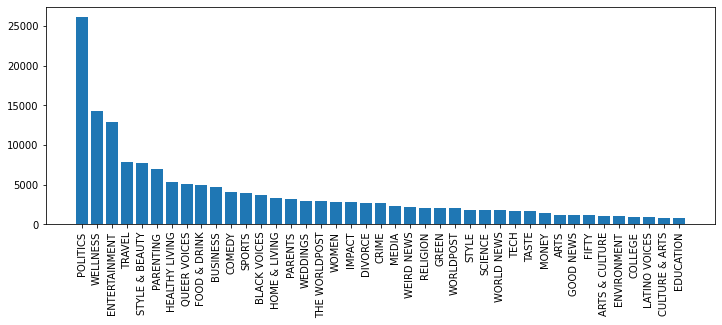

In [33]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=90)
class_counts = Counter(news_dataset['train']['category'])
class_names = [n for n, c in class_counts.most_common()]

plt.bar(class_names, [class_counts[c] for c in class_names])

In [8]:
from nltk import word_tokenize

In [14]:
word_counts = Counter()

for headline in tqdm(news_dataset['train']['headline']):
    word_counts.update(word_tokenize(headline.lower()))

In [31]:
class_frequencies = {k: v / sum(class_counts.values()) for k, v in class_counts.items()}

class_names_count = float(sum(c for n, c in word_counts.items() if n.upper() in class_counts))
word_frequencies = {k: word_counts[k.lower()] / class_names_count for k in class_counts.keys()}

<BarContainer object of 41 artists>

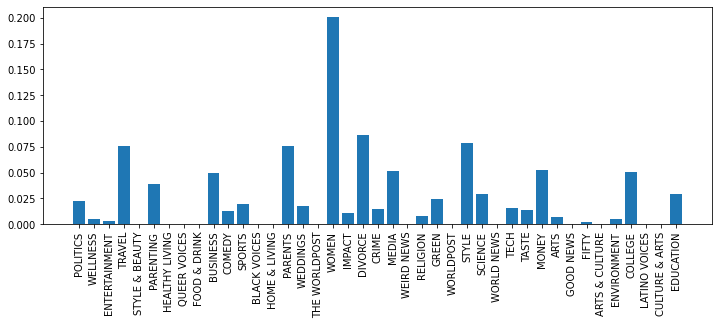

In [34]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=90)

plt.bar(class_names, [word_frequencies[c] for c in class_names])